In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpmath as mp
from time import time
from metropolis import run_metropolis
from count_solutions import count_solutions, estimate_zetab

### Time/Iterations to find one solution

In [23]:
N_arr = [4, 10, 26, 50, 100, 200, 500, 1000, 2000, 5000]
t_arr = []
iters_arr = []
n_repetitions = 5
max_moves = 1_000_000
beta = 20

np.random.seed(42)
for N in N_arr:
    t_arr_arr = []
    iters_arr_arr = []
    for _ in range(n_repetitions):
        t = time()
        iters, queens, _ = run_metropolis(
            N,
            max_moves,
            beta,
            mode="solve",
            beta_strategy="fixed",
            debug=False
        )
        t_arr_arr.append(time() - t)
        iters_arr_arr.append(iters)
    t_arr.append((t_arr_arr))
    iters_arr.append((iters_arr_arr))
    print(f"Solution found in {iters} moves, {time() - t:e} seconds.")

Solution found in 722462 moves, 5.717779e+02 seconds.


In [27]:
t_df = pd.DataFrame(t_arr, index=N_arr, columns=range(n_repetitions)).T
t_df = t_df.melt(var_name="N", value_name="time")
iters_df = pd.DataFrame(iters_arr, index=N_arr, columns=range(n_repetitions)).T
iters_df = iters_df.melt(var_name="N", value_name="iters")

In [28]:
# Save dataframes
t_df.to_csv("data/times.csv", index=False)
iters_df.to_csv("data/iters.csv", index=False)

In [34]:
# Load dataframes
N_arr = [4, 10, 26, 50, 100, 200, 500, 1000, 2000, 5000]
t_df = pd.read_csv("data/times.csv")
iters_df = pd.read_csv("data/iters.csv")

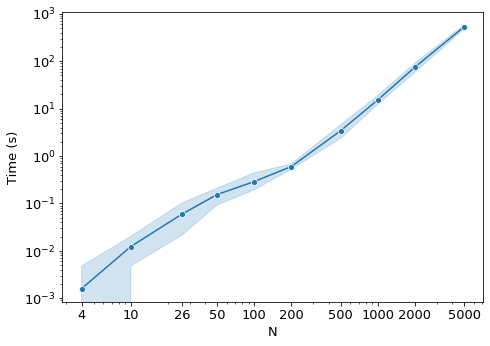

In [41]:
plt.rcParams.update({"font.size": 13})
plt.figure(figsize=(7, 5))
sns.lineplot(x="N", y="time", data=t_df, marker="o")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Time (s)")
plt.xticks(N_arr, N_arr)
plt.tight_layout()
plt.savefig("figures/times.pdf")
plt.show()

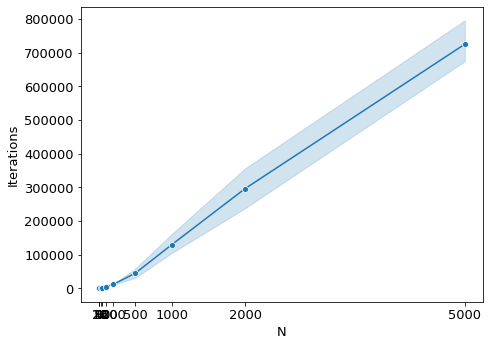

In [42]:
plt.rcParams.update({"font.size": 13})
plt.figure(figsize=(7, 5))
sns.lineplot(x="N", y="iters", data=iters_df, marker="o")

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Iterations")
plt.xticks(N_arr, N_arr)
plt.tight_layout()
plt.savefig("figures/iters.pdf")
plt.show()

### Number of solutions

In [2]:
def mpf_to_int(Z):
    Z_str = mp.nstr(Z, 3)
    if("e+" in Z_str):
        number, exponent = Z_str.split("e+")
    else:
        number = Z_str
        return int(float(number))
    number = int(float(number)*100)
    exponent = int(exponent) - 2
    Z_int = number * 10**exponent
    return Z_int


def int_to_str(Z):
    Z_str = str(Z)
    if(len(Z_str) <= 3):
        return Z_str
    exponent = len(Z_str) - 1
    number = Z_str[0] + "." + Z_str[1:3]
    return f"{number}e+{exponent}"
    

In [49]:
N_arr = [4, 8, 20, 21, 22, 23, 24, 25, 26, 50, 100, 200, 500, 1000]
beta_grid_small = [0, 0.01, 1, 3, 5, 10]
beta_grid_large = [
        0,
        0.01,
        0.1,
        0.25,
        0.375,
        0.5,
        0.625,
        0.75,
        1,
        1.25,
        1.5,
        1.75,
        2,
        2.5,
        3,
        4,
        5,
        10,
        20,
    ]
convergence_moves = 200_000
counting_moves = 800_000
Z_arr = []

for N in N_arr:
    if N <= 20:
        beta_grid = beta_grid_small
    else:
        beta_grid = beta_grid_large

    Z = count_solutions(N, convergence_moves, counting_moves, beta_grid, debug=False)
    Z_arr.append((mp.log(Z)))
    with mp.workdps(4):
        print(f"N = {N}, Z = {Z}")

N = 4, Z = 2.004
N = 8, Z = 94.74
N = 20, Z = 3.971e+10
N = 21, Z = 3.086e+11
N = 22, Z = 2.802e+12
N = 23, Z = 2.297e+13
N = 24, Z = 2.39e+14
N = 25, Z = 2.177e+15
N = 26, Z = 2.022e+16
N = 50, Z = 2.632e+44
N = 100, Z = 2.192e+117
N = 200, Z = 1.108e+293
N = 500, Z = 9.926e+924
N = 1000, Z = 1.268e+2136


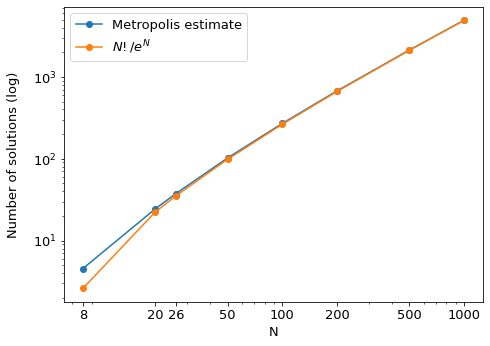

In [55]:
N_arr_plot = N_arr[1:3] + N_arr[8:]
Z_arr_plot = Z_arr[1:3] + Z_arr[8:]
Z_ref_arr = list(map(lambda N: mp.log(mp.factorial(N) / mp.exp(N)), N_arr_plot))

plt.rcParams.update({"font.size": 13})
plt.figure(figsize=(7, 5))
plt.plot(N_arr_plot, Z_arr_plot, "o-")
plt.plot(N_arr_plot, Z_ref_arr, "o-")
plt.xscale("log")
plt.yscale("log")

plt.legend(["Metropolis estimate", r"$N!/e^N$"])
plt.xlabel("N")
plt.ylabel("Number of solutions (log)", labelpad=13)
plt.xticks(N_arr_plot, N_arr_plot)
plt.tight_layout()
plt.savefig("figures/solutions.pdf")
plt.show()

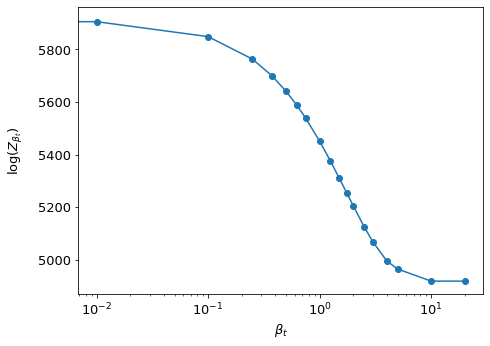

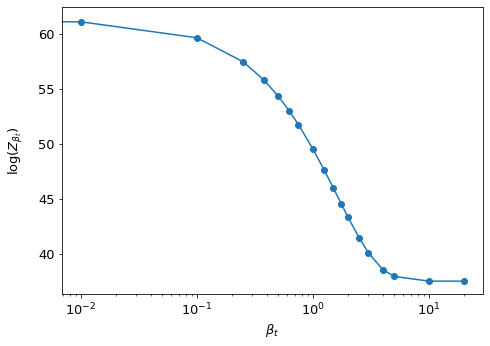

In [56]:
# Plot log(Z_beta) vs beta
for N in [1000, 26]:
    Z_arr = estimate_zetab(N, convergence_moves, counting_moves, beta_grid, debug=False)
    Z_arr = list(map(lambda Z: mp.log(Z), Z_arr))

    plt.rcParams.update({"font.size": 13})
    plt.figure(figsize=(7, 5))
    plt.plot(beta_grid, Z_arr, "o-")
    plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel(r"$\beta_t$")
    plt.ylabel(r"$\log(Z_{\beta_t})$", labelpad=13)
    plt.tight_layout()
    plt.savefig(f"figures/zetab_{N}.pdf")
    plt.show()